---

# t-SNE, UMAP and SVD

---

## Topics to be covered:

- Use-Case Intro
    - Scaling the data
- t-SNE
    - How does t-SNE work?
    - Steps in t-SNE
    - Applications of t-SNE
    - PCA vs t-SNE
    - t-SNE Implementation
        - Applying t-SNE
        - Visualization

- UMAP
    - How does UMAP work?
    - UMAP Hyperparameters
    - PCA vs t-SNE vs UMAP
    - UMAP Implementation
        - Applying UMAP
        - Visualization


- SVD
    - Significance of SVD
    - Components of SVD
    - Applications of SVD
    - SVD vs t-SNE vs UMAP


<br>

---

# Use-case Intro

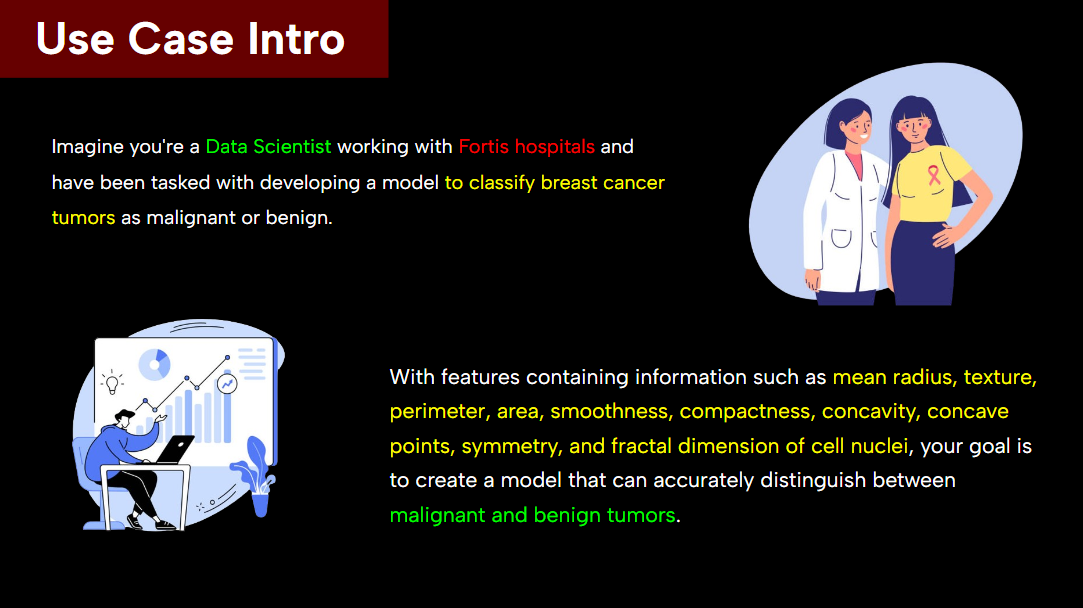

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!pip install -U gdown

In [ ]:
!gdown 1IyNmOaFUuPwi4BhIV0j1vrNv1Tmmmy80

Downloading...
From: https://drive.google.com/uc?id=1IyNmOaFUuPwi4BhIV0j1vrNv1Tmmmy80
To: /content/data.csv
100% 125k/125k [00:00<00:00, 2.17MB/s]


In [ ]:
df = pd.read_csv("/content/data.csv")
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [ ]:
df.drop(['Unnamed: 32', 'id'], axis = 1, inplace = True)

In [ ]:
X = df.iloc[:, 1:].values
y = df['diagnosis'].values

### Scaling the data

**Scaling our data is key** before using t-SNE or UMAP. It helps make sure all features are on a similar scale. This step is important because these methods focus a lot on measuring distances. Without scaling, some features might dominate just because they are larger, which can mess up the analysis. By scaling, we treat all features fairly, leading to better and clearer results in our data visualization.

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_sc = sc.fit_transform(X)

<br>

---
---

# t-SNE

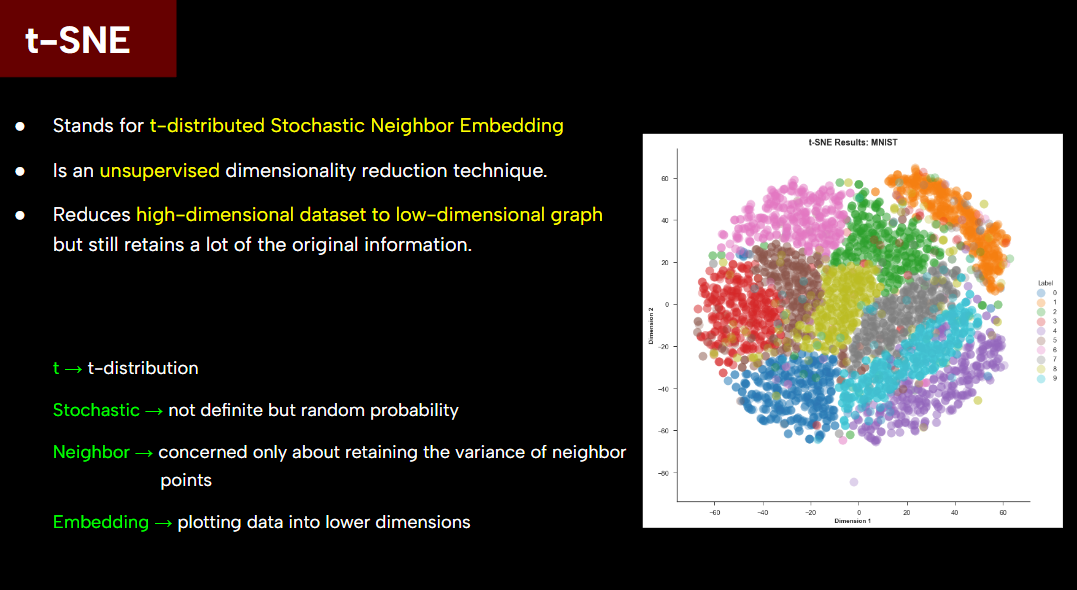

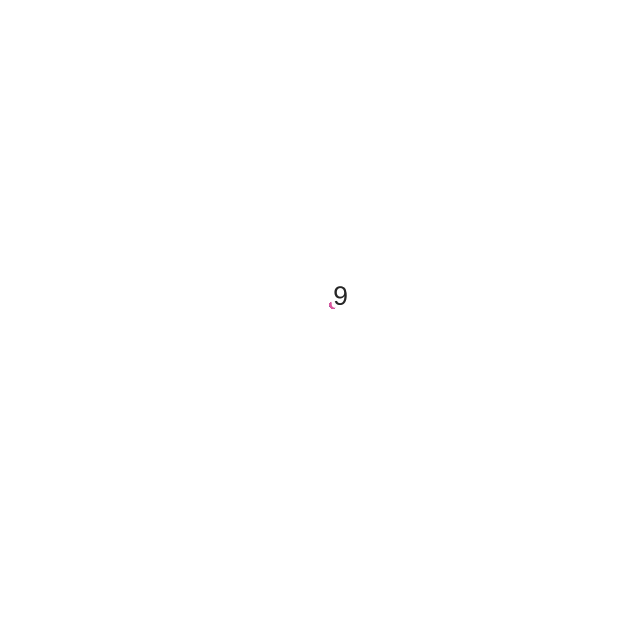

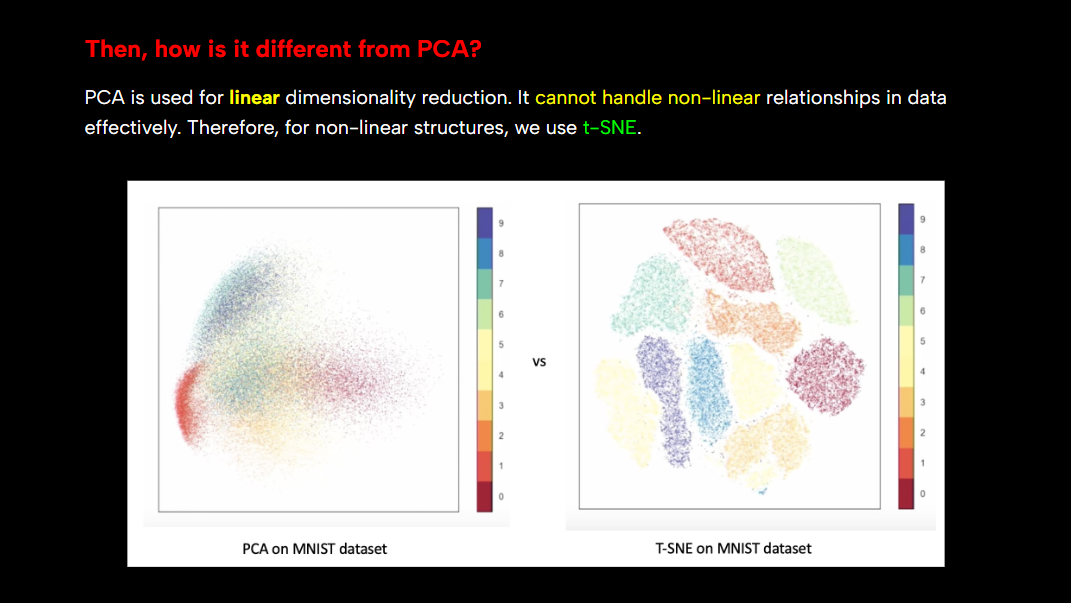

<br>


## How does t-SNE work?

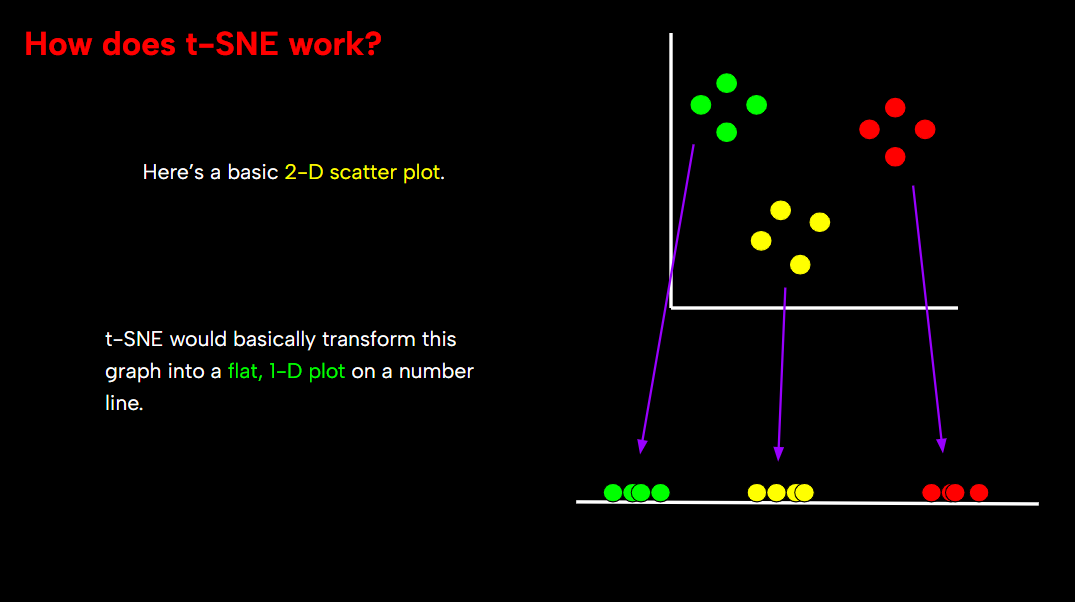

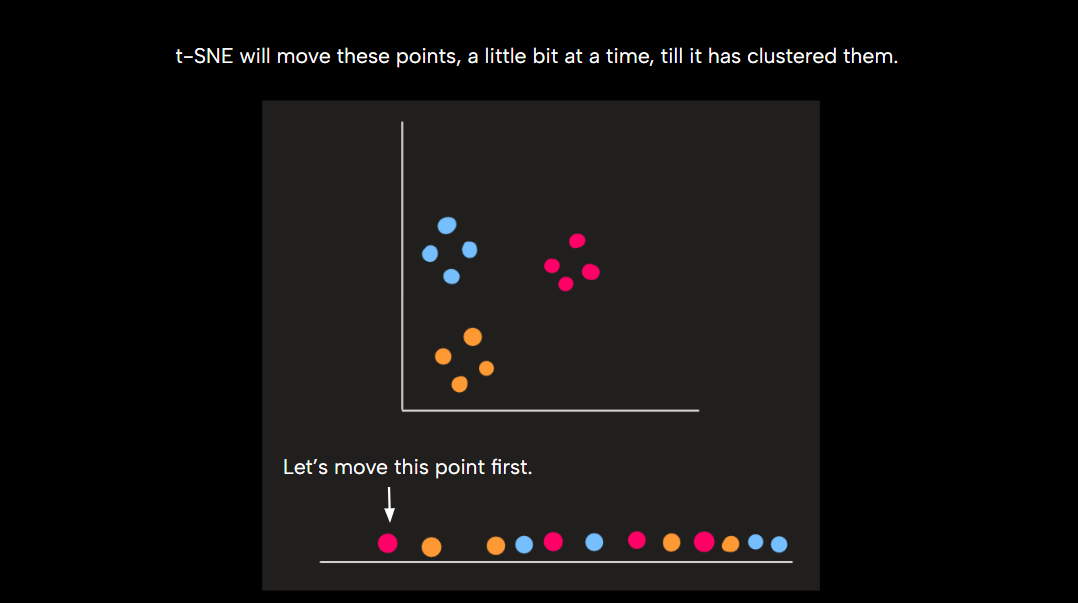

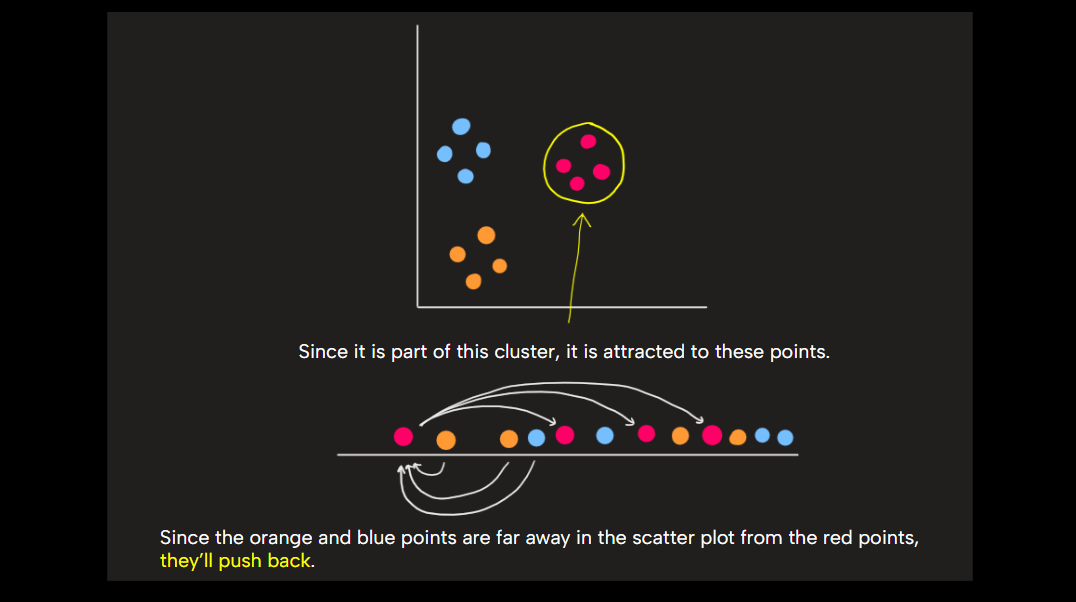

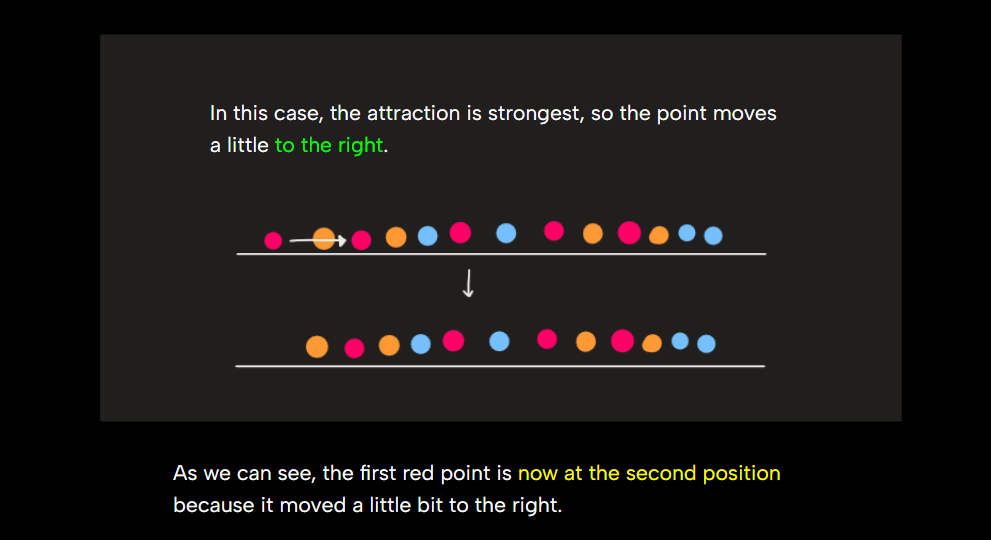

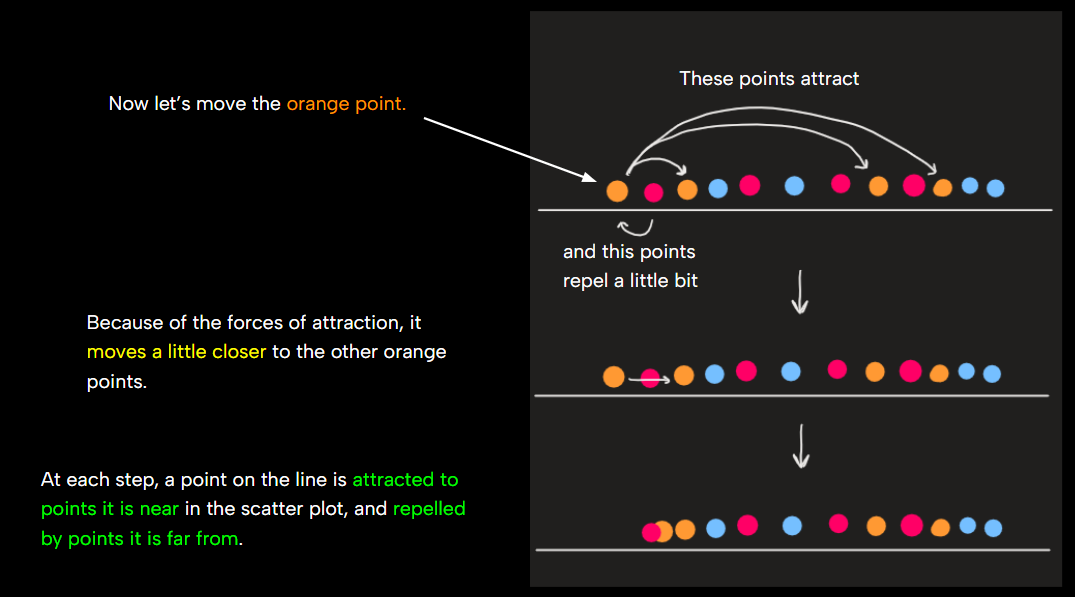

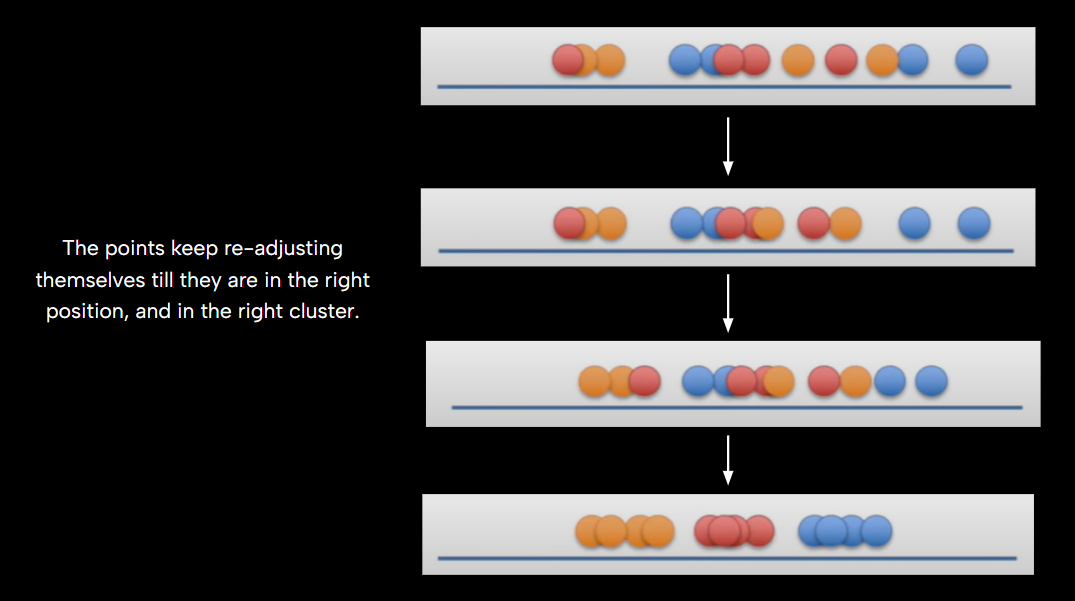

<br>

## Steps in t-SNE

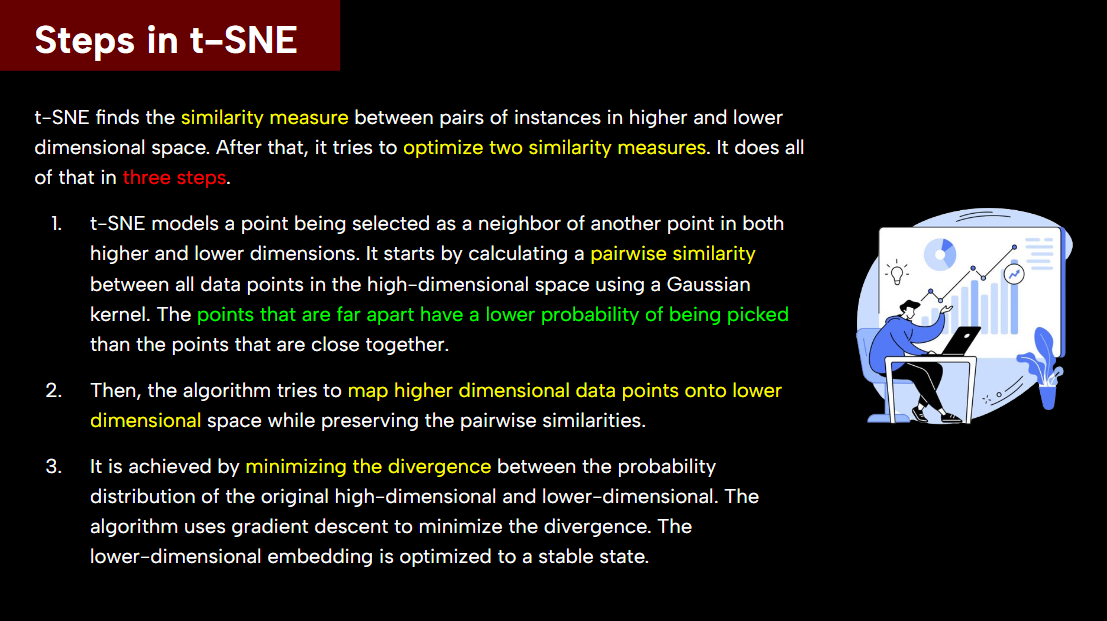

<br>

## Applications of t-SNE


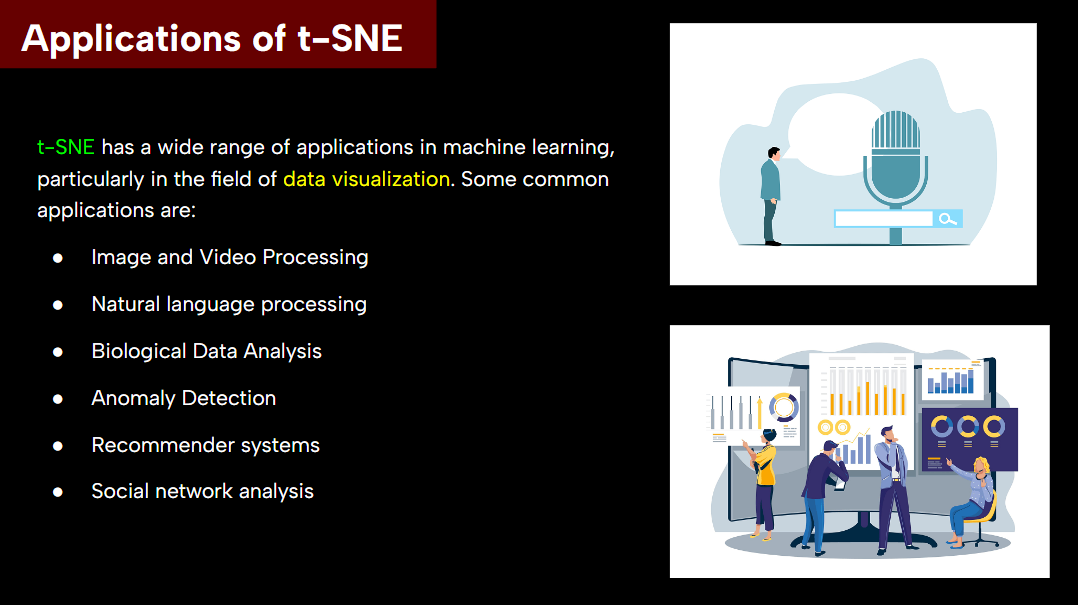

<br>

## Difference between PCA and t-SNE

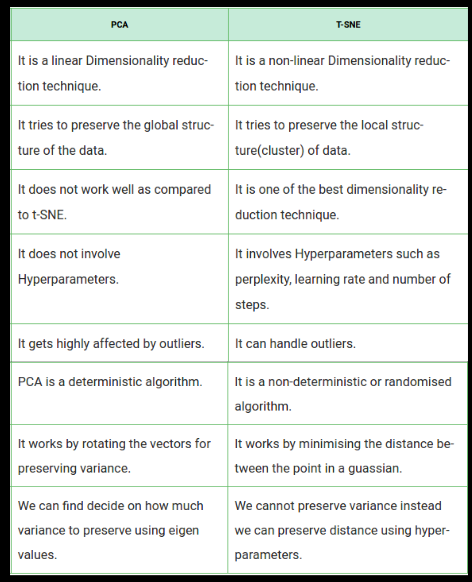

<br>

## t-SNE implementation

### Applying t-SNE

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, random_state = 0)
X_tsne = tsne.fit_transform(X_sc)

In [ ]:
X_tsne.shape

(569, 2)

In [ ]:
df_tsne=pd.DataFrame(X_tsne)

In [ ]:
df_tsne['y']=y
df_tsne.head()

0          1  y
0  38.578911   2.494724  M
1  24.303450   6.943472  M
2  31.938700   3.564493  M
3  20.674002 -13.834522  M
4  28.447147  -3.087035  M

### Visualization

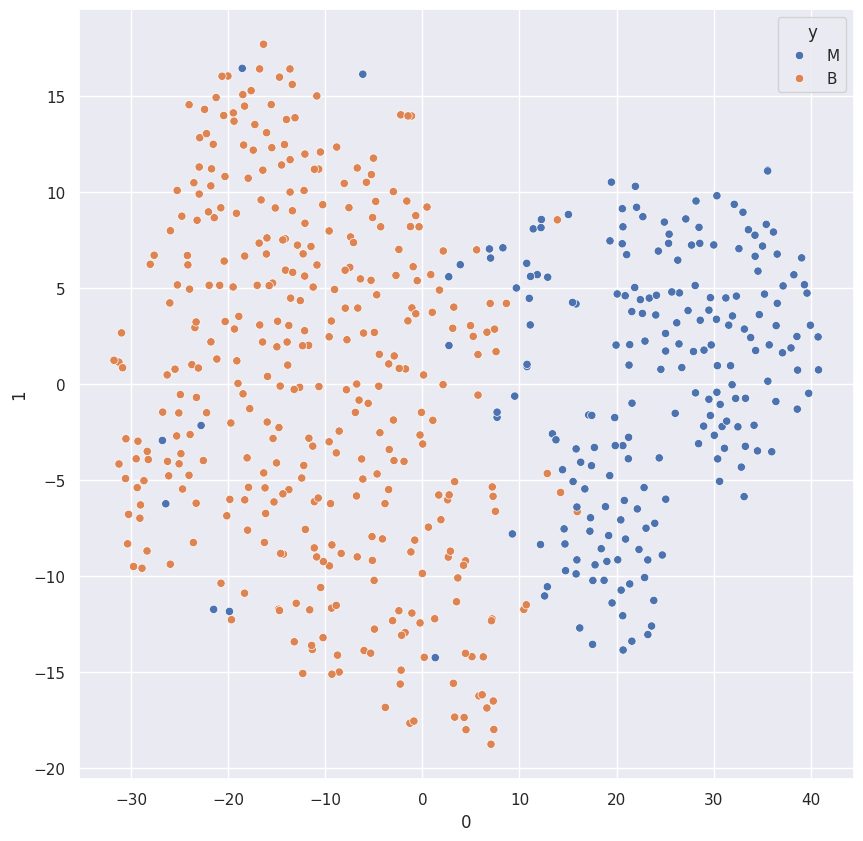

In [ ]:
plt.figure(figsize = (10,10))
sns.scatterplot(x = 0, y = 1,hue ='y',data=df_tsne)
plt.show()

<br>

---
---

# UMAP

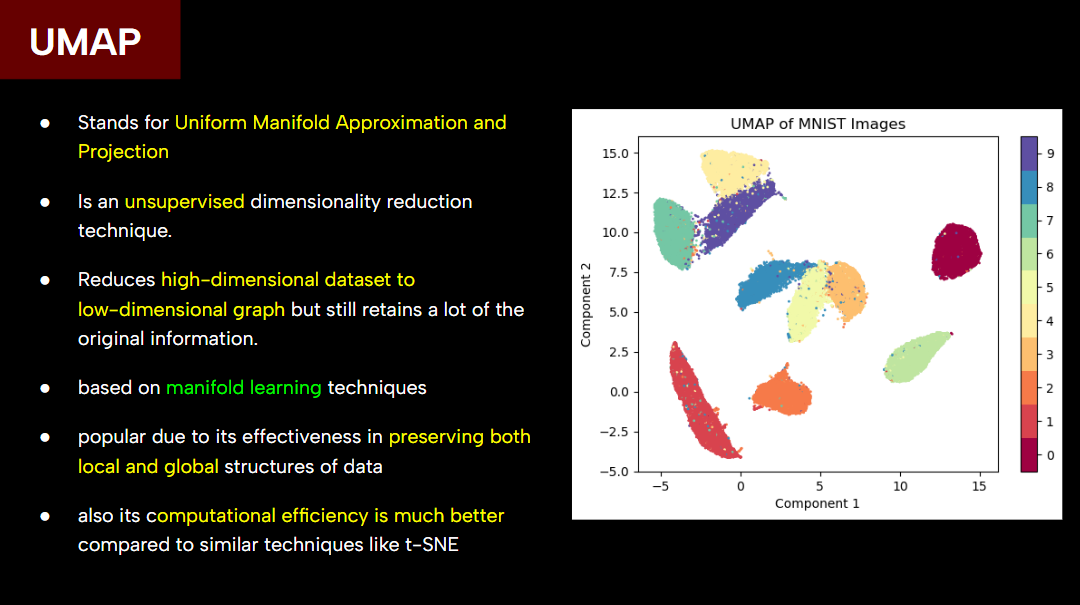

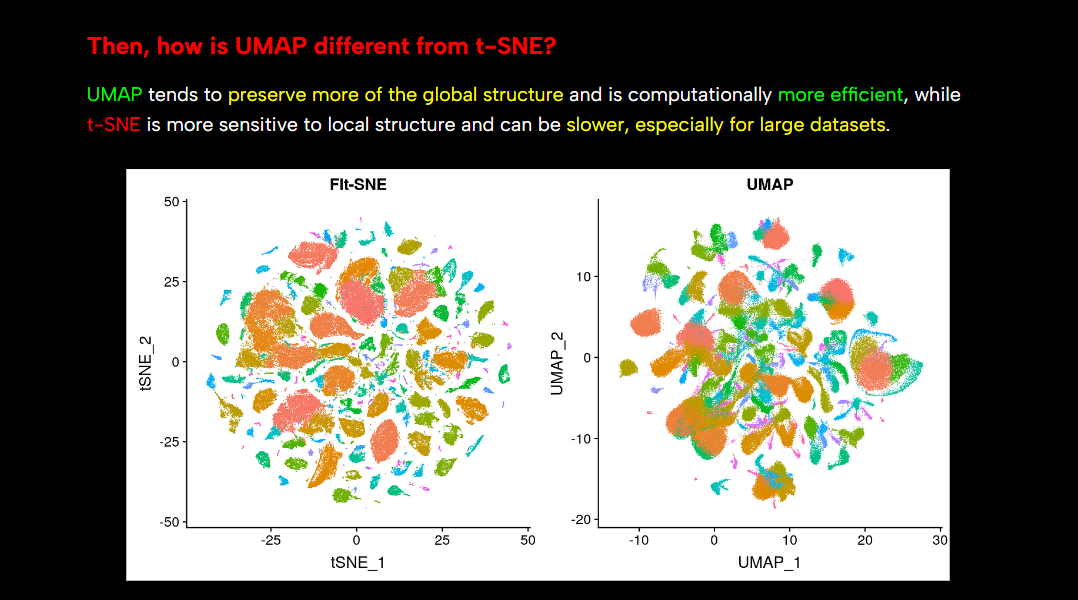

<br>

## UMAP hyperparameters

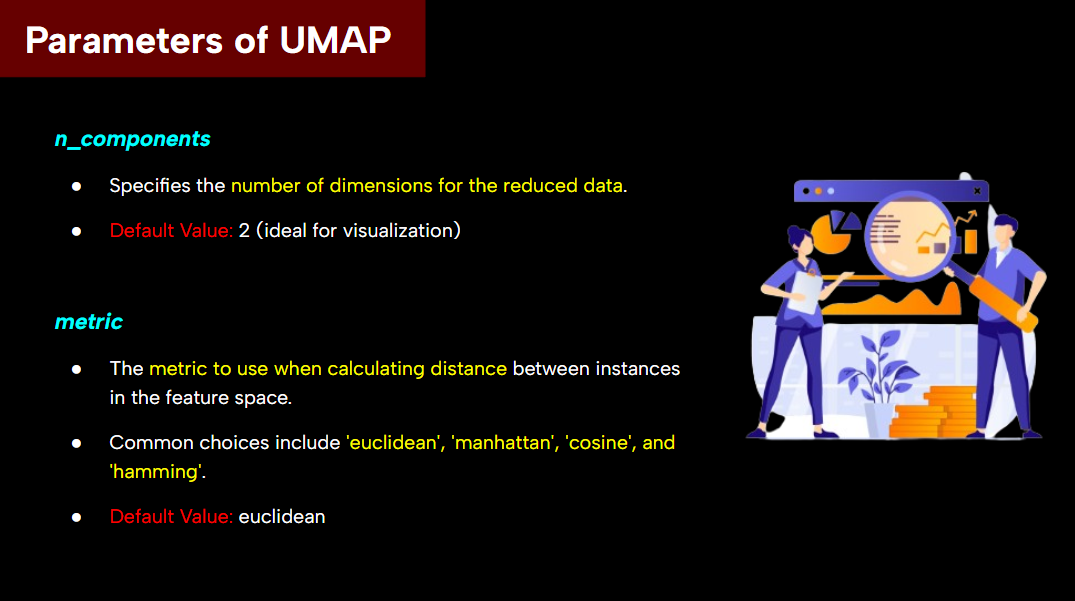

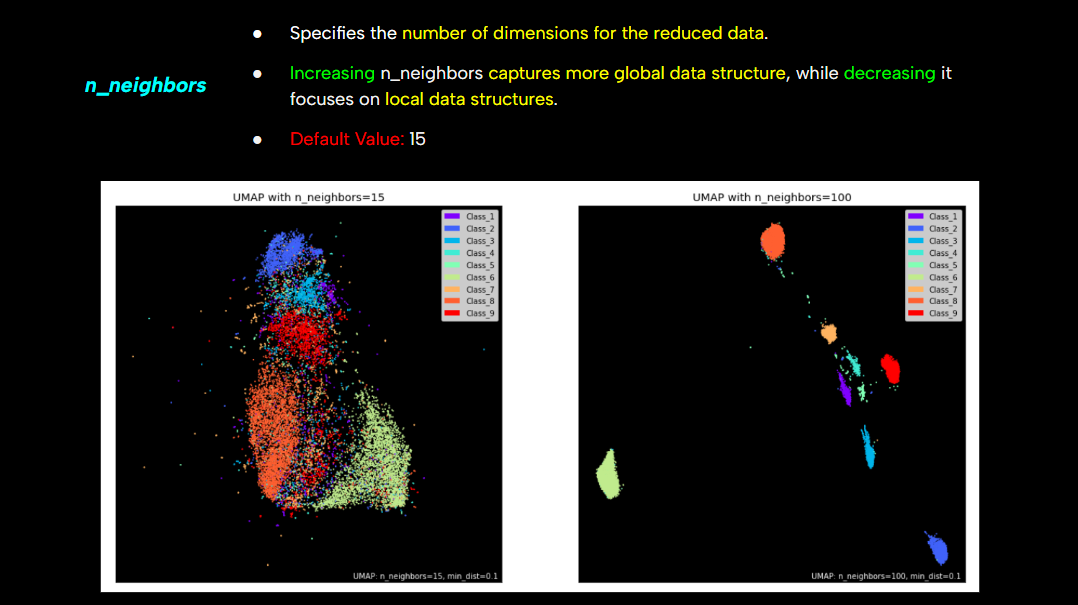

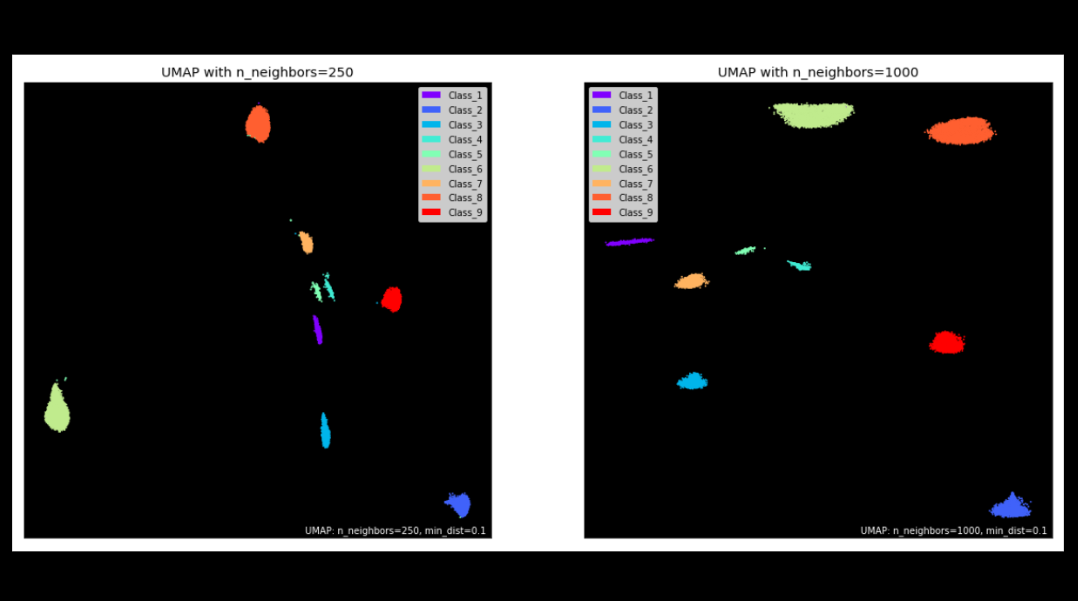

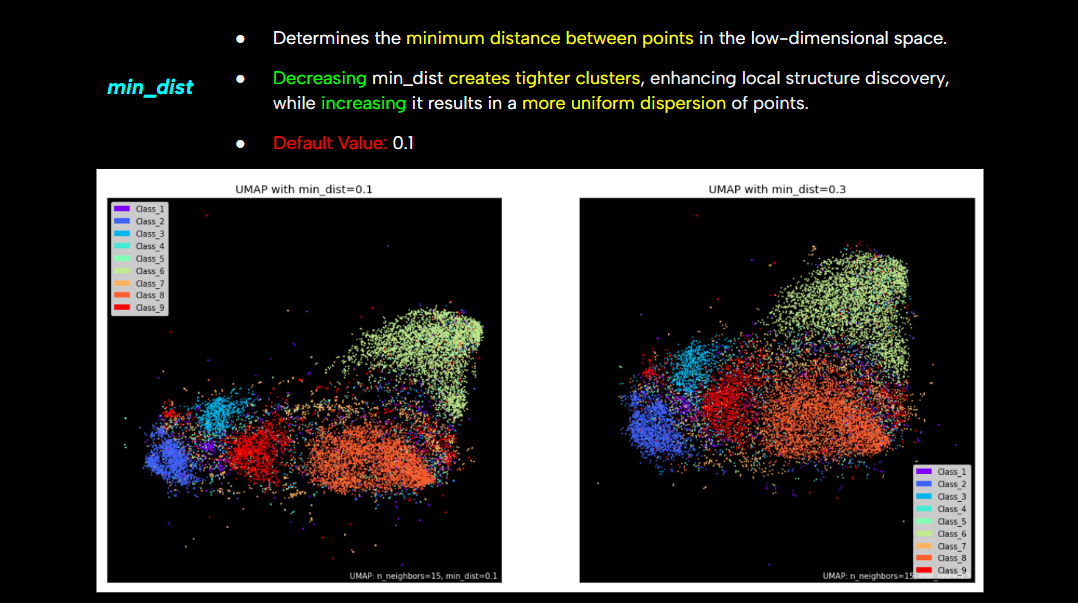

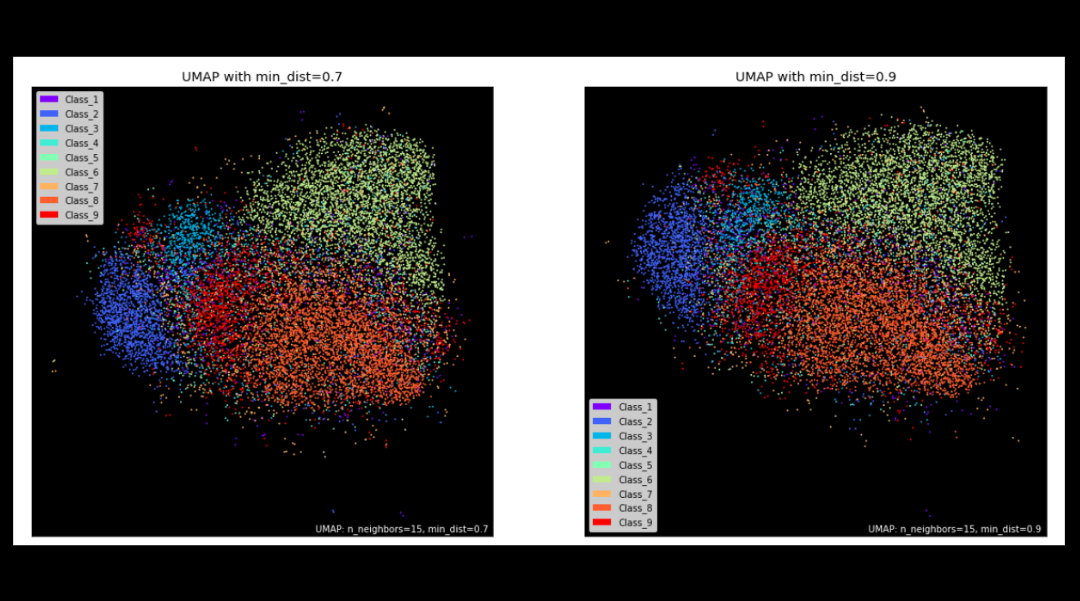

<br>

## PCA vs t-SNE vs UMAP

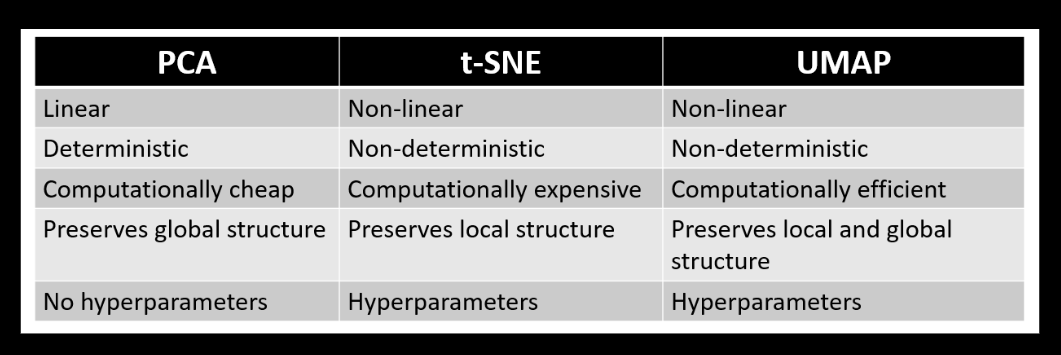

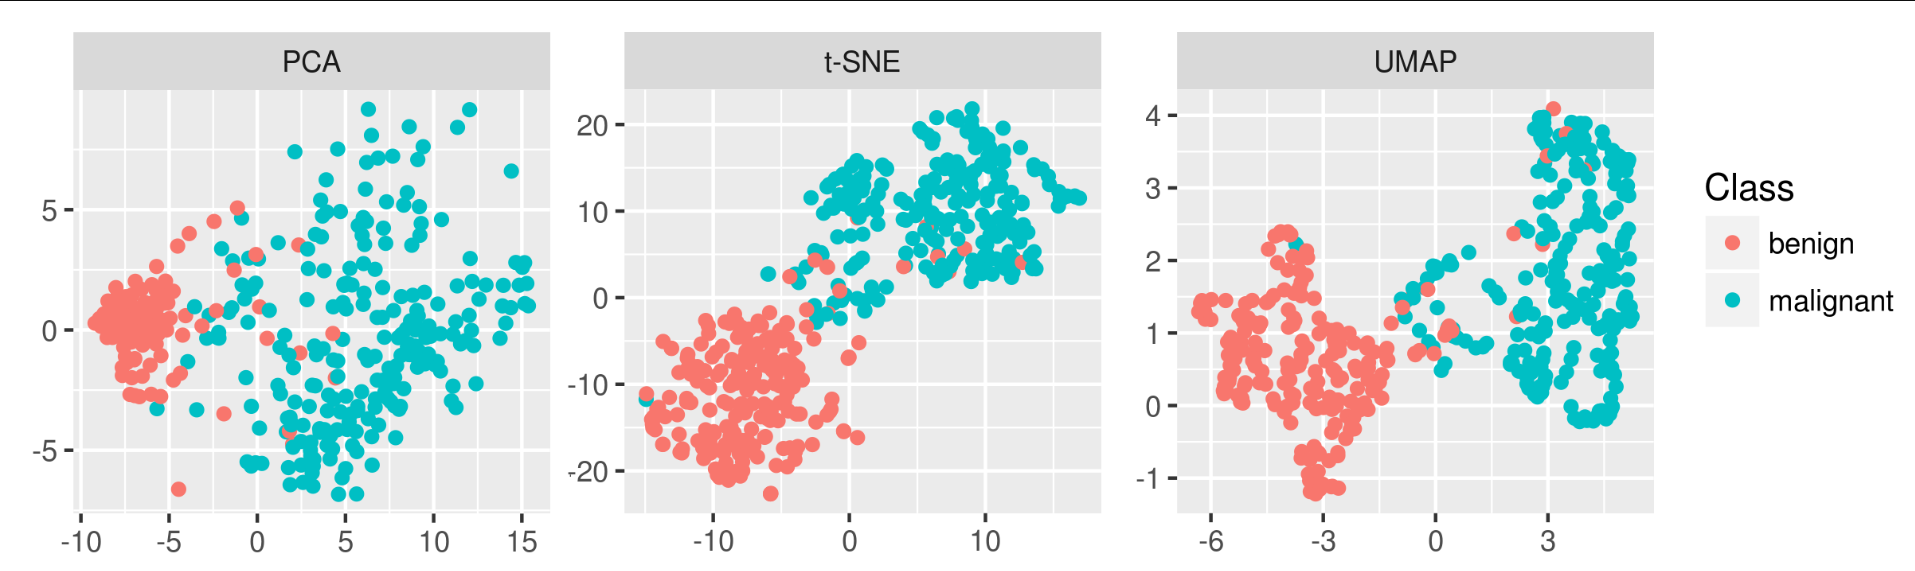

<br>

## UMAP Implementation

In [ ]:
!pip install umap-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.8 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=e2553b08c700a607d3640fdbf45b0bc7a2ffc534890a1a70b2507e8c53da9c4e
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


### Applying UMAP

In [ ]:
import umap

In [ ]:
# Initialize UMAP
umap_model = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=2, random_state=0)

In [ ]:
# Fit and transform the data
X_umap = umap_model.fit_transform(X_sc)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [ ]:
# Convert to DataFrame for visualization
df_umap = pd.DataFrame(X_umap, columns=['UMAP1', 'UMAP2'])
df_umap['y'] = y

### Visualization

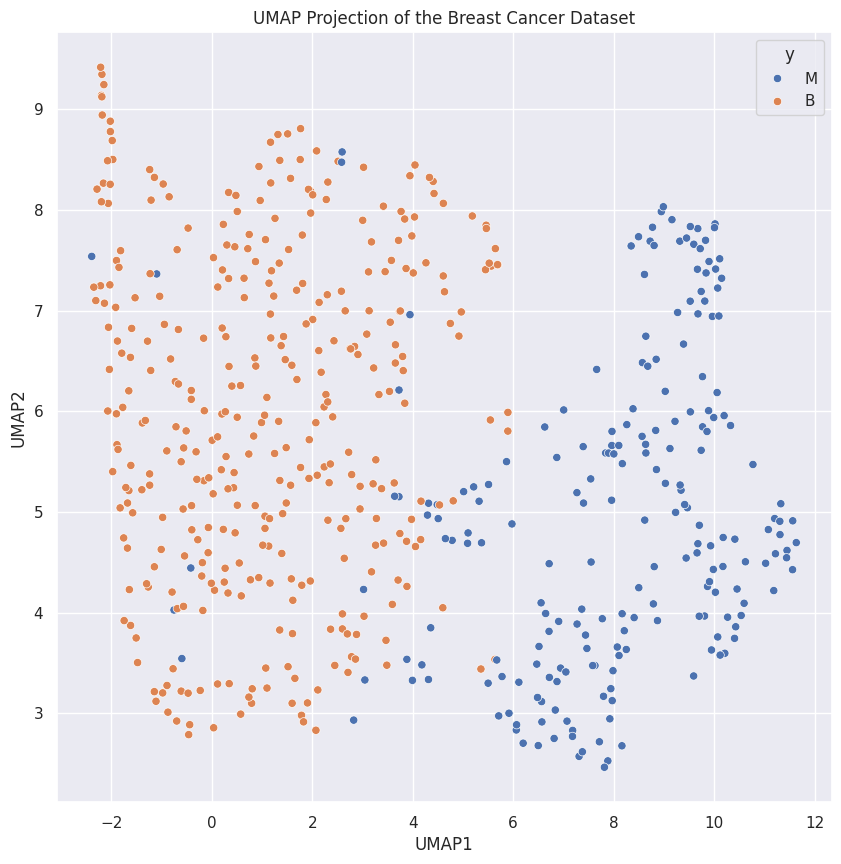

In [ ]:
# Visualization of the results
plt.figure(figsize=(10, 10))
sns.scatterplot(x='UMAP1', y='UMAP2', hue='y', data=df_umap)
plt.title('UMAP Projection of the Breast Cancer Dataset')
plt.show()

---
---

# SVD

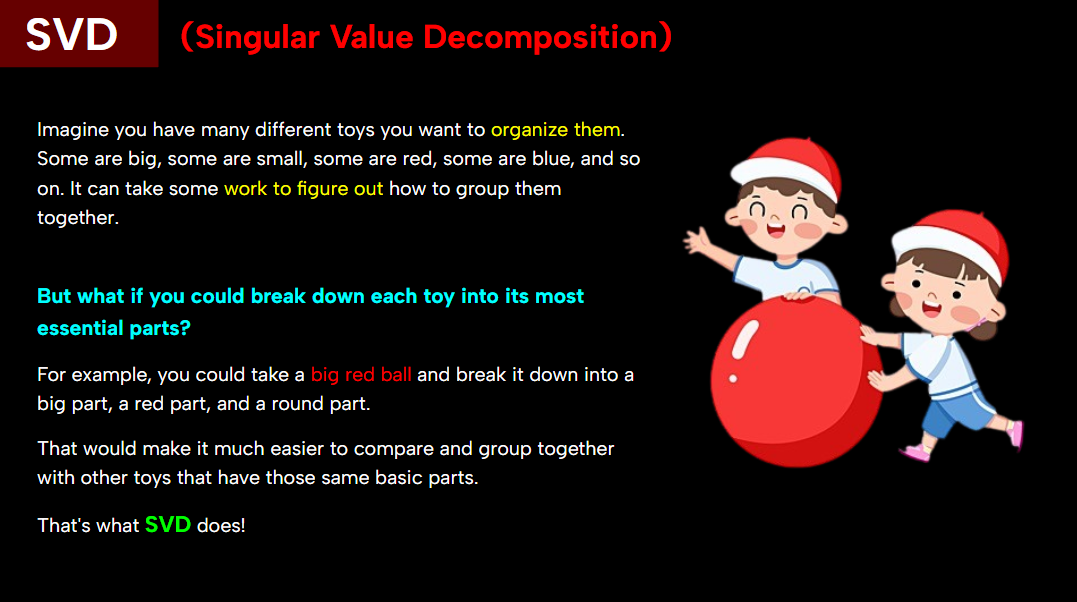

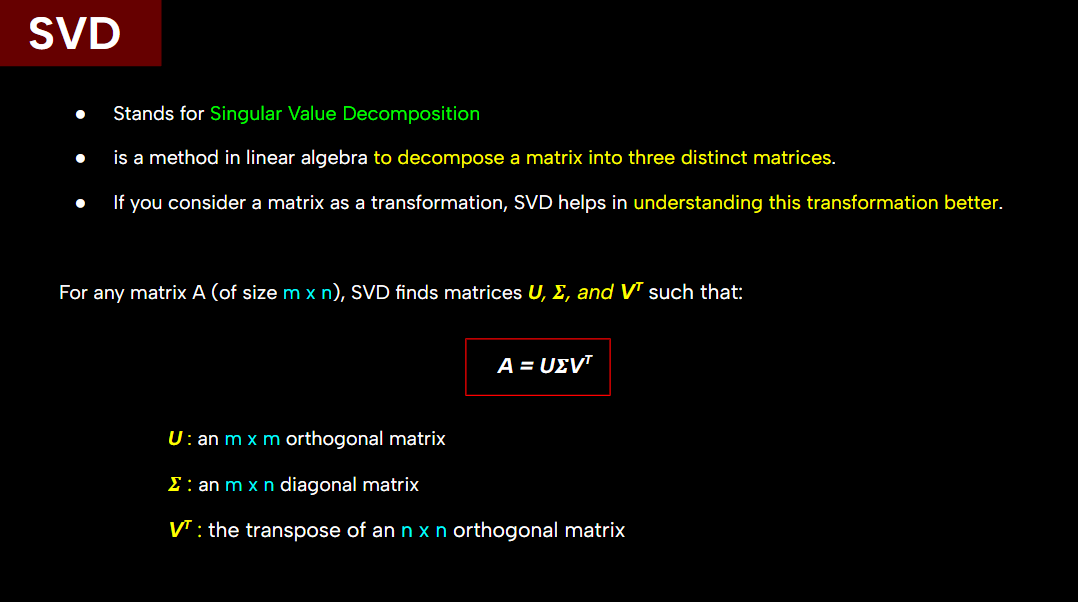

<br>

## Significance of SVD

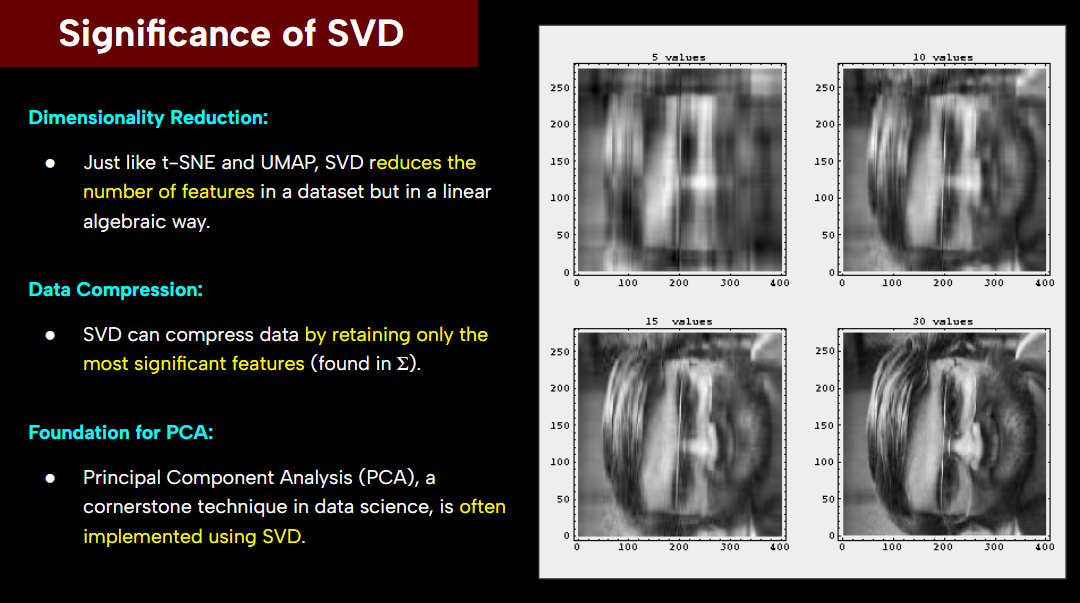

<br>

## Components of SVD

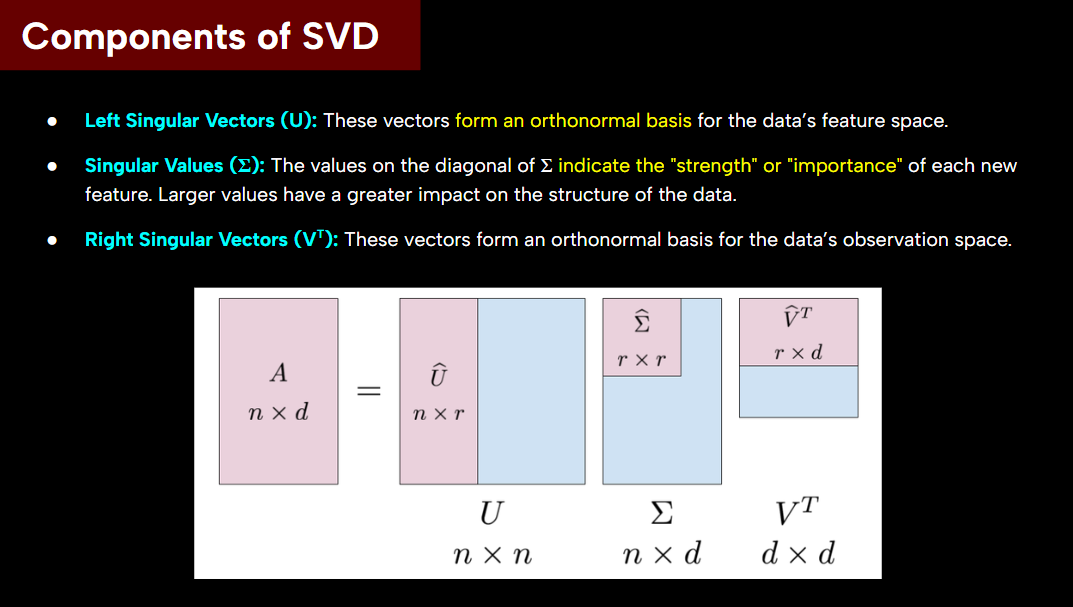

<br>

## Applications of SVD

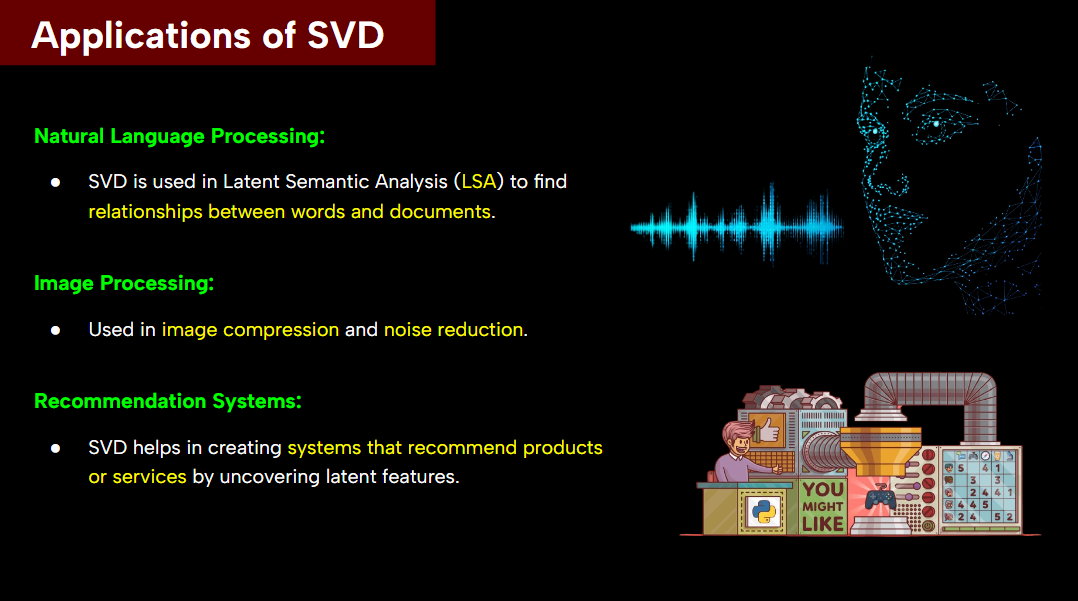

<br>

## SVD vs t-SNE vs UMAP


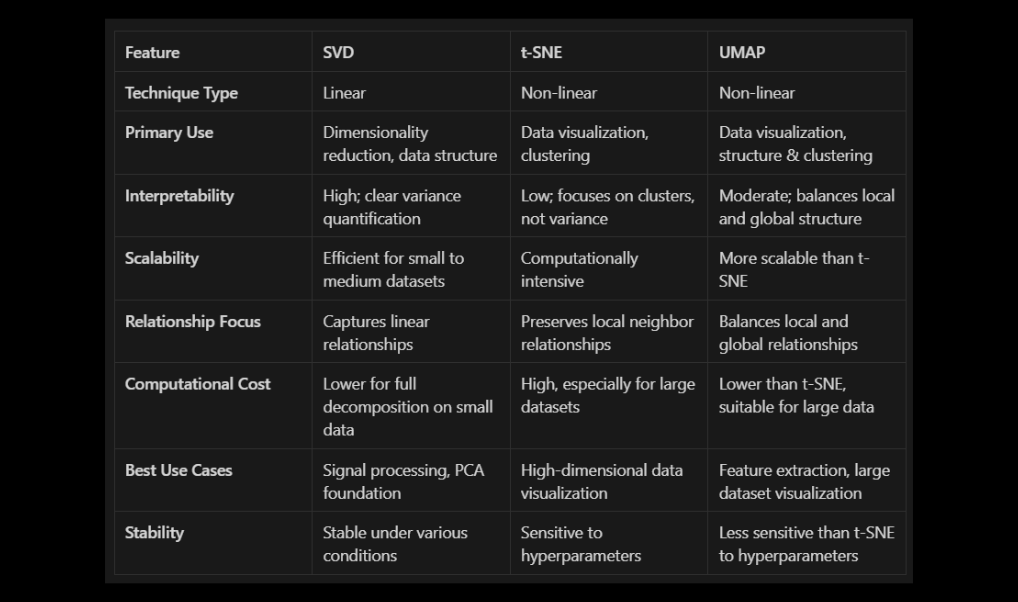

---
---